In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [3]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) # noise
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.3970, -1.5055]) 
label: tensor([6.5318])


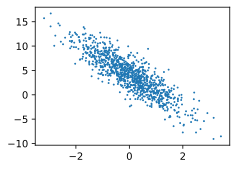

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [12]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [20]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.6075, -0.5089],
        [ 0.1546,  1.3395],
        [ 0.9397,  0.8198],
        [-1.0558,  1.1022],
        [ 0.3120,  1.6574],
        [ 1.5932, -0.9361],
        [-0.7985, -0.3431],
        [-0.4772, -0.4405],
        [-0.1841, -1.4485],
        [ 0.9436,  0.6553]]) 
 tensor([[ 9.1519],
        [-0.0384],
        [ 3.3051],
        [-1.6596],
        [-0.8130],
        [10.5529],
        [ 3.7580],
        [ 4.7429],
        [ 8.7573],
        [ 3.8593]])


In [22]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w,b

(tensor([[-0.0049],
         [-0.0115]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [23]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [25]:
help(torch.matmul)

Help on built-in function matmul in module torch:

matmul(...)
    matmul(input, other, *, out=None) -> Tensor
    
    Matrix product of two tensors.
    
    The behavior depends on the dimensionality of the tensors as follows:
    
    - If both tensors are 1-dimensional, the dot product (scalar) is returned.
    - If both arguments are 2-dimensional, the matrix-matrix product is returned.
    - If the first argument is 1-dimensional and the second argument is 2-dimensional,
      a 1 is prepended to its dimension for the purpose of the matrix multiply.
      After the matrix multiply, the prepended dimension is removed.
    - If the first argument is 2-dimensional and the second argument is 1-dimensional,
      the matrix-vector product is returned.
    - If both arguments are at least 1-dimensional and at least one argument is
      N-dimensional (where N > 2), then a batched matrix multiply is returned.  If the first
      argument is 1-dimensional, a 1 is prepended to its dimens

In [26]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [37]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [38]:
lr = 0.001
num_epochs = 10
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')



epoch 1, loss nan
epoch 2, loss nan
epoch 3, loss nan
epoch 4, loss nan
epoch 5, loss nan
epoch 6, loss nan
epoch 7, loss nan
epoch 8, loss nan
epoch 9, loss nan
epoch 10, loss nan


In [30]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0005, -0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0009], grad_fn=<RsubBackward1>)
